# 3. Exploratory Data Analysis

**Table of Contents**

Data into School Level Instances for Prediction

* Process
* Imputing Missing Values

Statistical Hypothesis Testing

* T-Test for means of two independent samples

Correlation Tests

* Matrix with Heatmap
* Pearson's Correlation Coefficient
* Spearman's Rank Correlation

Feature Selection

* Univariate Selection
* Feature Importance

Further Analysis for Recommendations

Variables for Modeling

* Decision for Variables
* Independent and Dependent Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.express as px
import plotly.graph_objs as go
from collections import Counter
from statistics import stdev, mean
import operator 

In [2]:
class Exploration_data_analysis():
    def __init__(self):
        print("Imported function from exploratory_data_analysis notebook")

We first set a target variable, e.g., 'Percentage Standard Exceeded' or 'Percentage Standard Not Met', to be investigated. We are interested in the group of students whose performance achievements are exceeded or too inferior. By knowing the characteristics affecting those groups, we can make a score prediction and suggest recommendations later.

In [3]:
target_col = "Percentage Standard Exceeded"

In [4]:
# global variables
ops = {'>': operator.gt, '<': operator.lt, '>=': operator.ge, '<=': operator.le, '=': operator.eq}
attr_avg_score = ['Target_Avg_Percentage Standard Exceeded', 'Target_Avg_Percentage Standard Met', 'Target_Avg_Percentage Standard Nearly Met', 'Target_Avg_Percentage Standard Not Met']

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('final_school_data.csv', sep='\t', encoding='utf-8')
final_data = df
final_data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
final_data.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900.0
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900.0
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900.0
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900.0
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900.0


In [8]:
df = final_data.copy()

## Data into School Level Instances for Prediction

### Process

For predicting schiil scores we need to focus on the school-level instances. Therefore, we transform and select data for each school.
We also need to derive new variables

**1. Student Number and Percentage**

In [9]:
df_studentNum = pd.pivot_table(df, index=['School Code', 'Category', 'Student Groups', 'Test Id'], values=['Students with Scores'])
df_studentNum.reset_index(inplace=True)
df_studentNum.head()

,School Code,Category,Student Groups,Test Id,Students with Scores
0,100016,All Students,All Students,English,139.0
1,100016,All Students,All Students,Mathematics,139.0
2,100016,Disability Status,Students with disability,English,21.0
3,100016,Disability Status,Students with disability,Mathematics,21.0
4,100016,Disability Status,Students with no reported disability,English,118.0


In [10]:
df_studentNum_pivot_table = df_studentNum.pivot_table(values='Students with Scores', index='School Code', columns=['Category', 'Student Groups', 'Test Id'], aggfunc='mean', fill_value=0)
df_studentNum_pivot_table.head()

Category       All Students                    Disability Status              \
Student Groups All Students             Students with disability               
Test Id             English Mathematics                  English Mathematics   
School Code                                                                    
100016                139.0       139.0                     21.0        21.0   
100024                383.0       385.0                     35.0        35.0   
100040                913.0       913.0                    105.0       105.0   
100065                 80.0        82.0                      0.0         0.0   
100081                579.0       576.0                     65.0        64.0   

Category                                                         \
Student Groups Students with no reported disability               
Test Id                                     English Mathematics   
School Code                                                       
100016                                        118.0       118.0   
100024                                        348.0       350.0   
100040                                        808.0       808.0   
100065                                         73.0        75.0   
100081                                        514.0       512.0   

Category                  Economic Status              \
Student Groups Economically disadvantaged               
Test Id                           English Mathematics   
School Code                                             
100016                               72.0        72.0   
100024                               39.0        39.0   
100040                              517.0       517.0   
100065                               72.0        74.0   
100081                              483.0       480.0   

Category                                                   \
Student Groups Not economically disadvantaged               
Test Id                               English Mathematics   
School Code                                                 
100016                                   67.0        67.0   
100024                                  344.0       346.0   
100040                                  396.0       396.0   
100065                                    0.0         0.0   
100081                                   96.0        96.0   

Category       English-Language Fluency              \
Student Groups          English learner               
Test Id                         English Mathematics   
School Code                                           
100016                              0.0         0.0   
100024                             12.0        12.0   
100040                             73.0        72.0   
100065                              0.0         0.0   
100081                             65.0        65.0   

Category                                                                                   \
Student Groups English learners (ELs) enrolled in school in the U.S. fewer than 12 months   
Test Id                                                                           English   
School Code                                                                                 
100016                                                        0.0                           
100024                                                        0.0                           
100040                                                        0.0                           
100065                                                        0.0                           
100081                                                        0.0                           

Category                    \
Student Groups               
Test Id        Mathematics   
School Code                  
100016                 0.0   
100024                 0.0   
100040                 0.0   
100065                 0.0   
100081                 0.0   

Catego

In [11]:
# concatinate all column names
def concat_col_names(pivot_table, pre="", post=""):
    cols = pivot_table.columns.values.tolist()
    col_list=[]
    for c in cols:
        col_list.append(pre+"_".join(c)+post)
    pivot_table.columns = col_list
    pivot_table.fillna(0)

In [12]:
concat_col_names(df_studentNum_pivot_table, pre="Num_")
df_studentNum_pivot_table.head()

,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_American Indian or Alaska Native_English,Num_Ethnicity_American Indian or Alaska Native_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Native Hawaiian or Pacific Islander_English,Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asian_English,Nu

We also calculate the average of both English and Mathematics for number and percentage of students.

In [13]:
df_studentNum_pivot_table_avg = df_studentNum.pivot_table(values='Students with Scores', index='School Code', columns=['Category', 'Student Groups'], aggfunc='mean', fill_value=0)
concat_col_names(df_studentNum_pivot_table_avg, pre="Num_Avg_")

# calculate the percentage variables
for col in df_studentNum_pivot_table_avg.columns:
    if "Num_" in col:
        # Handling division by zero in Pandas calculations
        pct = (df_studentNum_pivot_table_avg[col]/df_studentNum_pivot_table_avg["Num_Avg_All Students_All Students"]).replace(np.inf, 0)*100
        df_studentNum_pivot_table_avg["Pct_"+col.strip("Num_")] = pct.round(2)

We add new variables by combining Asian and Whites as well as Hispanic and Black students in the Ethnicity.  
Each group lies and shows very similar pattern in the scores, such 'Percentage Standard Exceeded' or 'Percentage Standard Not Met', so we expect these merging can reduce the dimensionality or tell new insights.

In [14]:
#new variables (Asian+Whiate, Hispanic+Black)
ethinicity_combi_cols = [['Asian', 'White'], ['Hispanic or Latino', 'Black or African American']]

df_studentNum_pivot_table["Pct_Multi_Ethnicity_Asian+White_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"], axis=1)
df_studentNum_pivot_table["Pct_Multi_Ethnicity_Asian+White_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Asian+White"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"])/2 + (x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Num_Multi_Ethnicity_Asian+White_English"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"], axis=1)
df_studentNum_pivot_table["Num_Multi_Ethnicity_Asian+White_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Num_Avg_Multi_Ethnicity_Asian+White"] = df_studentNum_pivot_table.apply(lambda x: (x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][0]+"_Mathematics"])/2 + (x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[0][1]+"_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Pct_Multi_Ethnicity_Hispanic+Black_English"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"], axis=1)
df_studentNum_pivot_table["Pct_Multi_Ethnicity_Hispanic+Black_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Pct_Avg_Multi_Ethnicity_Hispanic+Black"] = df_studentNum_pivot_table.apply(lambda x: (x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"])/2 + (x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"]+x["Pct_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"])/2, axis=1)

df_studentNum_pivot_table["Num_Multi_Ethnicity_Hispanic+Black_English"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"], axis=1)
df_studentNum_pivot_table["Num_Multi_Ethnicity_Hispanic+Black_Mathematics"] = df_studentNum_pivot_table.apply(lambda x: x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"], axis=1)
df_studentNum_pivot_table["Num_Avg_Multi_Ethnicity_Hispanic+Black"] = df_studentNum_pivot_table.apply(lambda x: (x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][0]+"_Mathematics"])/2 + (x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_English"]+x["Num_Ethnicity_"+ethinicity_combi_cols[1][1]+"_Mathematics"])/2, axis=1)

KeyError: 'Pct_Ethnicity_Asian_English'

In [ ]:
df_studentNum_pivot_table_avg.info()

**2. House Price**

We extract the significant column, 'House_median', that is expected to be very useful in predicting school scores

In [15]:
df_houseprice = pd.pivot_table(df, index=["School Code"], values=['House_median'])
df_houseprice.head()

,House_median
School Code,
100016,190100.0
100024,635000.0
100040,356300.0
100065,655900.0
100081,299600.0


**3. Test Score (Target Variable)**

In [16]:
attr_score = ['Percentage Standard Exceeded', 'Percentage Standard Met', 'Percentage Standard Nearly Met', 'Percentage Standard Not Met']
df_scores = pd.pivot_table(data=df, index=['School Code', 'Student Groups', 'Category', 'Test Id'], values=attr_score, aggfunc='mean', fill_value=0)
df_scores.reset_index(inplace=True)
df_scores.head()

,School Code,Student Groups,Category,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
0,100016,All Students,All Students,English,8.63,36.69,20.14,34.53
1,100016,All Students,All Students,Mathematics,7.19,23.02,29.50,40.29
2,100016,College graduate,Parent Education,English,13.46,44.23,15.38,26.92
3,100016,College graduate,Parent Education,Mathematics,11.54,26.92,32.69,28.85
4,100016,Economically disadvantaged,Economic Status,English,6.94,29.17,19.44,44.44


In [17]:
df_all_scores = df_scores.loc[(df_scores['Student Groups'] == 'All Students') & (df_scores['Category'] == 'All Students')]
df_scores_pivot_table = df_all_scores.pivot_table(values=attr_score, index='School Code', columns=['Category', 'Student Groups', 'Test Id'])
df_scores_pivot_table.head()

Percentage Standard Exceeded              \
Category                       All Students               
Student Groups                 All Students               
Test Id                             English Mathematics   
School Code                                               
100016                                 8.63        7.19   
100024                                53.00       46.23   
100040                                10.84       14.02   
100065                                22.50       20.73   
100081                                15.89        3.13   

               Percentage Standard Met              \
Category                  All Students               
Student Groups            All Students               
Test Id                        English Mathematics   
School Code                                          
100016                           36.69       23.02   
100024                           30.55       32.21   
100040                           36.04       19.28   
100065                           40.00       15.85   
100081                           28.15       13.19   

               Percentage Standard Nearly Met              \
Category                         All Students               
Student Groups                   All Students               
Test Id                               English Mathematics   
School Code                                                 
100016                                  20.14       29.50   
100024                                  11.23       16.88   
100040                                  28.26       29.35   
100065                                  30.00       35.37   
100081                                  29.19       22.40   

               Percentage Standard Not Met              
Category                      All Students              
Student Groups                All Students              
Test Id                            English Mathematics  
School Code                                             
100016                               34.53       40.29  
100024                                5.22        4.68  
100040                               24.86       37.35  
100065                                7.50       28.05  
100081                               26.77       61.28

In [18]:
concat_col_names(df_scores_pivot_table)
df_scores_pivot_table.head()

,Percentage Standard Exceeded_All Students_All Students_English,Percentage Standard Exceeded_All Students_All Students_Mathematics,Percentage Standard Met_All Students_All Students_English,Percentage Standard Met_All Students_All Students_Mathematics,Percentage Standard Nearly Met_All Students_All Students_English,Percentage Standard Nearly Met_All Students_All Students_Mathematics,Percentage Standard Not Met_All Students_All Students_English,Percentage Standard Not Met_All Students_All Students_Mathematics
School Code,,,,,,,,
100016,8.63,7.19,36.69,23.02,20.14,29.50,34.53,40.29
100024,53.00,46.23,30.55,32.21,11.23,16.88,5.22,4.68
100040,10.84,14.02,36.04,19.28,28.26,29.35,24.86,37.35
100065,22.50,20.73,40.00,15.85,30.00,35.37,7.50,28.05
100081,15.89,3.13,28.15,13.19,29.19,22.40,26.77,61.28


We delete substrings "_All Students" in column names and prepare "Target_" to score related columns.

In [19]:
df_score_pivot_table = df_scores_pivot_table.rename(columns = {col: col.replace("_All Students", "") for col in df_scores_pivot_table.columns})
df_scores_pivot_table.columns = ["Target_"+ col for col in df_scores_pivot_table.columns]

We can calculate the average scores of English and Mathematics by using `groupby()` function by excluding `Test Id` from the keys and using the `mean()` as an aggregate function.

In [20]:
df_avg = df_scores.groupby(["School Code", "Category", "Student Groups"], as_index=False).mean(numeric_only=True).round(2)

We rename the variables for the readability, consistency, and understandability. As in the Ethnicity, we add the new variable, `Target_Avg_Multi_Percentage Standard Exceeded + Percentage Standard Met`, by combining `Percentage Standard Exceeded` and `Percentage Standard Met`. This variable helps to identify the failry performance achieveing schools

In [21]:
df_score_avg = df_avg.copy()
df_score_avg = df_score_avg.loc[(df_score_avg["Category"] == "All Students") & (df_score_avg["Student Groups"] == "All Students")]
df_score_avg = df_score_avg.rename(columns = {'Percentage Standard Exceeded':'Target_Avg_Percentage Standard Exceeded',
                                             'Percentage Standard Met': 'Target_Avg_Percentage Standard Met',
                                             'Percentage Standard Nearly Met': 'Target_Avg_Percetage Standard Nearly Met',
                                             'Percentage Standard Not Met': 'Target_Avg_Percentage Standard Not Met'})
df_score_avg.drop(columns = ["Category", "Student Groups"], axis=1, inplace=True)
# new variables
df_score_avg["Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met"] = df_score_avg['Target_Avg_Percentage Standard Exceeded'] + df_score_avg['Target_Avg_Percentage Standard Met']
df_score_avg.head()

,School Code,Target_Avg_Percentage Standard Exceeded,Target_Avg_Percentage Standard Met,Target_Avg_Percetage Standard Nearly Met,Target_Avg_Percentage Standard Not Met,Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met
0,100016,7.91,29.85,24.82,37.41,37.76
19,100024,49.61,31.38,14.06,4.95,80.99
45,100040,12.43,27.66,28.80,31.10,40.09
74,100065,21.62,27.92,32.68,17.77,49.54
87,100081,9.51,20.67,25.80,44.02,30.18


**4. Merging**

We combine all dataframe fro the scholl score prediction.

In [22]:
df_studentNum_pivot_table_avg.head()

,Num_Avg_All Students_All Students,Num_Avg_Disability Status_Students with disability,Num_Avg_Disability Status_Students with no reported disability,Num_Avg_Economic Status_Economically disadvantaged,Num_Avg_Economic Status_Not economically disadvantaged,Num_Avg_English-Language Fluency_English learner,Num_Avg_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months,Num_Avg_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_Avg_English-Language Fluency_English only,Num_Avg_English-Language Fluency_Ever-ELs,Num_Avg_English-Language Fluency_Fluent English proficient and English only,Num_Avg_English-Language Fluency_Initial fluent English proficient (IFEP),Num_Avg_English-Language Fluency_Reclassified fluent English proficient (RFEP),Num_Avg_English-Language Fluency_To be determined (TBD),Num_Avg_Ethnicity_American Indian or Alaska Native,Num_Avg_Ethnicity_Asian,Num_Avg_Ethnicity_Black or African American,Num_Avg_Ethnicity_Filipino,Num_Avg_Ethnicity_Hispanic or Latino,Num_Avg_Ethnicity_Native Hawaiian or Pacific Islander,Num_Avg_Ethnicity_Two or more races,Num_Avg_Ethnicity_White,Num_Avg_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native,Num_Avg_Ethnicity for Economically Disadvantaged_Asian,Num_Avg_Ethnicity for Economically Disadvantaged_Black or African American,Num_Avg_Ethnicity for Economically Disadvantaged_Filipino,Num_Avg_Ethnicity for Economically Disadvantaged_Hispanic or Latino,Num_Avg_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander,Num_Avg_Ethnicity for Economically Disadvantaged_Two or more races,Num_Avg_Ethnicity for Economically Disadvantaged_White,Num_Avg_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native,Num_Avg_Ethnicity for Not Economically Disadvantaged_Asian,Num_Avg_Ethnicity for Not Economically Disadvantaged_Black or African American,Num_Avg_Ethnicity for Not Economically Disadvantaged_Filipino,Num_Avg_Ethnicity for Not Economically Disadvantaged_Hispanic or Latino,Num_Avg_Ethnicity for Not Economically Disadvantaged_Native Hawaiian or Pacific Islander,Num_Avg_Ethnicity for Not Economically Disadvantaged_Two or more races,Num_Avg_Ethnicity for Not Economically Disadvantaged_White,Num_Avg_Gender_Female,Num_Avg_Gender_Male,Num_Avg_Migrant_Migrant education,Num_Avg_Parent Education_College graduate,Num_Avg_Parent Education_Declined to state,Num_Avg_Parent Education_Graduate school/Post graduate,Num_Avg_Parent Education_High school graduate,Num_Avg_Parent Education_Not a high school graduate,Num_Avg_Parent Education_Some college (includes AA degree),Pct_Avg_All Students_All Students,Pct_Avg_Disability Status_Students with disability,Pct_Avg_Disability Status_Students with no reported disability,Pct_Avg_Economic Status_Economically disadvantaged,Pct_Avg_Economic Status_Not economically disadvantaged,Pct_Avg_English-Language Fluency_English learner,Pct_Avg_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months,Pct_Avg_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Pct_Avg_English-Language Fluency_English only,Pct_Avg_English-Language Fluency_Ever-ELs,Pct_Avg_English-Language Fluency_Fluent English proficient and English only,Pct_Avg_English-Language Fluency_Initial fluent English proficient (IFEP),Pct_Avg_English-Language Fluency_Reclassified fluent English proficient (RFEP),Pct_Avg_English-Language Fluency_To be determined (TBD),Pct_Avg_Ethnicity_American Indian or Alaska Native,Pct_Avg_Ethnicity_Asian,Pct_Avg_Ethnicity_Black or African American,Pct_Avg_Ethnicity_Filipino,Pct_Avg_Ethnicity_Hispanic or Latino,Pct_Avg_Ethnicity_Native Hawaiian or Pacific Islander,Pct_Avg_Ethnicity_Two or more races,Pct_Avg_Ethnicity_White,Pct_Avg_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native,Pct_Avg_Ethnicity for Economically Disadvantaged_Asian,Pct_Avg

**4. Merging**

We combine all dataframe for the school score prediction

In [23]:
# merge in a row for each school

df_schools = pd.merge(df_studentNum_pivot_table, df_studentNum_pivot_table_avg, how='left', on='School Code')

dF_schools = pd.merge(df_schools, df_houseprice, how='left', on="School Code")

df_schools = pd.merge(df_schools, df_scores_pivot_table, how='left', on="School Code")

df_schools = pd.merge(df_schools, df_score_avg, how='left', on="School Code")

In [24]:
df_schools.shape

(8768, 201)

In [25]:
# groupby to make a dataframe (as_index=False)
df_schools_names = df.groupby(["School Code", 'School Name', 'District Name', 'County Name'], as_index=False).mean(numeric_only=True).round(2)
df_schools_names = df_schools_names.loc[:, ["School Code", "School Name", "District Name", "County Name"]]
df_schools_names.head()

,School Code,School Name,District Name,County Name
0,100016,Sherman Thomas Charter,Sherman Thomas Charter,Madera
1,100024,Oak Meadow Elementary,Buckeye Union Elementary,El Dorado
2,100040,Robert L. Mccaffrey Middle,Galt Joint Union Elementary,Sacramento
3,100065,Oakland Unity High,Oakland Unity High,Alameda
4,100081,William J. (Pete) Knight High,Antelope Valley Union High,Los Angeles


In [26]:
df_schools.head()

,School Code,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_American Indian or Alaska Native_English,Num_Ethnicity_American Indian or Alaska Native_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Native Hawaiian or Pacific Islander_English,Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asia

In [27]:

df_schools_names_all = pd.merge(df_schools_names, df_schools, how='left', on='School Code')
df_schools_names_all.head()

,School Code,School Name,District Name,County Name,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_American Indian or Alaska Native_English,Num_Ethnicity_American Indian or Alaska Native_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Native Hawaiian or Pacific Islander_English,Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity f

In [28]:
#free space
del df_studentNum_pivot_table
del df_studentNum_pivot_table_avg
del df_houseprice
del df_scores_pivot_table
del df_score_avg
del df_scores

### Imputing Missimg Values

Before we put features into a mode, missing values must be filled and all featurers must be encoded.

For various reasons, many real world datasets contains missin values, often encoded as blanks, NaNs or other placeholders. Such datasetset however are incompactible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to descard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.   
https://scikit-learn.org/stable/modules/impute.html  

To deal with the missing values, we use the basic strategies for imputing missing values. Missing values are imputed using the statistics of the *mean* of each column in which the missing values are located. 

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

In [30]:
def replace_missing_values(df,number_features):
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [31]:
df_schools = replace_missing_values(df_schools, df_schools.columns)
df_schools

,School Code,Num_All Students_All Students_English,Num_All Students_All Students_Mathematics,Num_Disability Status_Students with disability_English,Num_Disability Status_Students with disability_Mathematics,Num_Disability Status_Students with no reported disability_English,Num_Disability Status_Students with no reported disability_Mathematics,Num_Economic Status_Economically disadvantaged_English,Num_Economic Status_Economically disadvantaged_Mathematics,Num_Economic Status_Not economically disadvantaged_English,Num_Economic Status_Not economically disadvantaged_Mathematics,Num_English-Language Fluency_English learner_English,Num_English-Language Fluency_English learner_Mathematics,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_English,Num_English-Language Fluency_English learners (ELs) enrolled in school in the U.S. fewer than 12 months_Mathematics,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_English,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more_Mathematics,Num_English-Language Fluency_English only_English,Num_English-Language Fluency_English only_Mathematics,Num_English-Language Fluency_Ever-ELs_English,Num_English-Language Fluency_Ever-ELs_Mathematics,Num_English-Language Fluency_Fluent English proficient and English only_English,Num_English-Language Fluency_Fluent English proficient and English only_Mathematics,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_English,Num_English-Language Fluency_Initial fluent English proficient (IFEP)_Mathematics,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_English,Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)_Mathematics,Num_English-Language Fluency_To be determined (TBD)_Mathematics,Num_Ethnicity_American Indian or Alaska Native_English,Num_Ethnicity_American Indian or Alaska Native_Mathematics,Num_Ethnicity_Asian_English,Num_Ethnicity_Asian_Mathematics,Num_Ethnicity_Black or African American_English,Num_Ethnicity_Black or African American_Mathematics,Num_Ethnicity_Filipino_English,Num_Ethnicity_Filipino_Mathematics,Num_Ethnicity_Hispanic or Latino_English,Num_Ethnicity_Hispanic or Latino_Mathematics,Num_Ethnicity_Native Hawaiian or Pacific Islander_English,Num_Ethnicity_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity_Two or more races_English,Num_Ethnicity_Two or more races_Mathematics,Num_Ethnicity_White_English,Num_Ethnicity_White_Mathematics,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Economically Disadvantaged_Asian_English,Num_Ethnicity for Economically Disadvantaged_Asian_Mathematics,Num_Ethnicity for Economically Disadvantaged_Black or African American_English,Num_Ethnicity for Economically Disadvantaged_Black or African American_Mathematics,Num_Ethnicity for Economically Disadvantaged_Filipino_English,Num_Ethnicity for Economically Disadvantaged_Filipino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_English,Num_Ethnicity for Economically Disadvantaged_Hispanic or Latino_Mathematics,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_English,Num_Ethnicity for Economically Disadvantaged_Native Hawaiian or Pacific Islander_Mathematics,Num_Ethnicity for Economically Disadvantaged_Two or more races_English,Num_Ethnicity for Economically Disadvantaged_Two or more races_Mathematics,Num_Ethnicity for Economically Disadvantaged_White_English,Num_Ethnicity for Economically Disadvantaged_White_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_English,Num_Ethnicity for Not Economically Disadvantaged_American Indian or Alaska Native_Mathematics,Num_Ethnicity for Not Economically Disadvantaged_Asia

## Statistical Hypothesis Testing

### T-Test for means of two independent samples

Now we perform a hypothesis test (two-sample test) by assuming two groups of smaples are independent.

- $H_0$: There is **no difference** in students' score between sample1 and sample2.
- $H_1$: There **exist difference** in students' scores between sample1 and sample2.
- α = 0.05

In [32]:
def ttest_ind_two(category1, group1, category2, group2, target_col):
    df_sample1 = df.loc[(df['Category'] == category1) & (df['Student Groups'] == group1)][target_col]
    df_sample2 = df.loc[(df['Category'] == category2) & (df['Student Groups'] == group2)][target_col]
    t, p_val = stats.ttest_ind(df_sample1, df_sample2)
    return t, p_val

Here is the student group information `studentGroup_types` we try to investigate.

In [33]:
# get dataframe using groupby

studentGroup_types = df.groupby(["Category", "Student Groups"], as_index=False).mean(numeric_only=True)
studentGroup_types = studentGroup_types.loc[:, ["Category", "Student Groups"]]
studentGroup_types

,Category,Student Groups
0,All Students,All Students
1,Disability Status,Students with disability
2,Disability Status,Students with no reported disability
3,Economic Status,Economically disadvantaged
4,Economic Status,Not economically disadvantaged
5,English-Language Fluency,English learner
6,English-Language Fluency,English learners (ELs) enrolled in school in t...
7,English-Language Fluency,English learners enrolled in school in the U.S...
8,English-Language Fluency,English only
9,English-Language Fluency,Ever-ELs


'Category' = ['Student Groups']
* "All Students" = [All Students]
* "Gender" = [Male, Female]  
* "Ethnicity" = [American Indian or Alaska Native, Asian, Black or African American, Filipino, Hispanic or Latino, Native Hawaiian or Pacific Islander, Two or more races, White]
* "English-Language Fluency" = [English learner, English learners (ELs) enrolled in school in the U.S. fewer than 12 months, English learners enrolled in school in the U.S. 12 months or more, English only, Ever-ELs, Fluent English proficient and English only, Initial fluent English proficient (IFEP), Reclassified fluent English proficient (RFEP), To be determined (TBD)]
* "Parent Education" = [College graduate, Declined to state, Graduate school/Post graduate, High school graduate, Not a high school graduate, Some college (includes AA degree)]
* "Migrant" = [Migrant education]
* "Economic Status" = [Economically disadvantaged, Not economically disadvantaged]
* "Disability Status" = [Students with disability, Students with no reported disability]
* "Ethnicity for Economically Disadvantaged" = [American Indian or Alaska Native, Asian, Black or African American, Filipino, Hispanic or Latino, Native Hawaiian or Pacific Islander, Two or more races, White]
* Ethnicity for Not Economically Disadvantaged = [American Indian or Alaska Native, Asian, Black or African American, Filipino, Hispanic or Latino, Native Hawaiian or Pacific Islander, Two or more races, White]

We tests whether the means of two independent samples are significantly different.
If there is no difference (p-value is greater or equal than $\alpha$ 0.05), then we want to **eliminate or merge** that student group information due to too much generating features.

**T-Test for all pairs of student group information**

In [34]:
print("T-test for the means of two samples for on target value '{}'".format(target_col))
l = len(studentGroup_types)
no_diff = []
for i in range(0,1):
    for j in range(i+1,1):
        category1 = studentGroup_types.iloc[i]["Category"]
        group1 = studentGroup_type.ilc[i]["Student Groups"]
        category2 = studentGroup_types.iloc[j]["Category"]
        group2 = studentGroup_type.ilc[j]["Student Groups"]
        
        t, p_val = ttest_ind_two(category1, group1, category2, group2, target_col)
        if p_val > 0.05: # no difference (cannot reject H0)
            no_diff.append((category1, group1))
            no_diff.append((category2, group2))

T-test for the means of two samples for on target value 'Percentage Standard Exceeded'


We sorted the student group information on the order of the occurrences. The following shows the results with the counter number. We can use this results when getting rid of the student group information for generating less number of features. In other words, we want to generate and use the features that strongly affect for predicting the school scores.

**T-Test between subject (English and Mathematics)**

In [35]:
print("Among {} groups, the below listed groups do not show the score difference between subjects of English and Mathematics.".format(studentGroup_types.shape[0]))

def ttest_ind_two_subject(category, group, target_col):
    df_sample1 = df.loc[(df['Category'] == category) & (df['Student Groups'] == group) & (df['Test Id'] == 'English')][target_col]
    df_sample2 = df.loc[(df['Category'] == category) & (df['Student Groups'] == group) & (df['Test Id'] == 'Mathematics')][target_col]
    t, p_val = stats.ttest_ind(df_sample1, df_sample2)
    if(p_val > 0.05):
        print("({} : {}), t-test: {:.10f}, p-value: {:.10f}".format(category, group, t, p_val))
        

for index, row in studentGroup_types.iterrows():
    ttest_ind_two_subject(row['Category'], row['Student Groups'], target_col)

Among 47 groups, the below listed groups do not show the score difference between subjects of English and Mathematics.
(Ethnicity : Asian), t-test: -0.6442098461, p-value: 0.5194586434
(Ethnicity for Economically Disadvantaged : American Indian or Alaska Native), t-test: -0.2165423008, p-value: 0.8288461695
(Ethnicity for Economically Disadvantaged : Asian), t-test: -1.6896659140, p-value: 0.0911595770
(Ethnicity for Economically Disadvantaged : Native Hawaiian or Pacific Islander), t-test: 1.9116670138, p-value: 0.0571893681
(Ethnicity for Not Economically Disadvantaged : American Indian or Alaska Native), t-test: 0.6731867988, p-value: 0.5041967295
(Ethnicity for Not Economically Disadvantaged : Native Hawaiian or Pacific Islander), t-test: -0.0863412353, p-value: 0.9316259214
(Gender : Male), t-test: 0.9157011439, p-value: 0.3598364743


==> The score differences exist in most of the groups. However, we may eliminate the subjects (`Test Id`) for further analysis or constructing prediction models, because the subject difference is not our major concerns.

### Specific interest pairs of student groups¶

We again analyzed the two samples (where we have special interests in those relations) using the T-test.

In [36]:
#Gender
print('Gender')
t, p_val = ttest_ind_two('Gender', 'Male', 'Gender', 'Female', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

#Ethinity
print('Ethnicity')
t, p_val = ttest_ind_two('Ethnicity', 'Asian', 'Ethnicity', 'White', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity', 'Asian', 'Ethnicity', 'Filipino', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity for Economically Disadvantaged', 'Asian', 'Ethnicity', 'Asian', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity for Economically Disadvantaged', 'Asian', 'Ethnicity', 'Asian', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

print('Minor Ethnicity')
t, p_val = ttest_ind_two('Ethnicity', 'Black or African American', 'Ethnicity', 'Native Hawaiian or Pacific Islander', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity', 'American Indian or Alaska Native', 'Ethnicity', 'Native Hawaiian or Pacific Islander', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('Ethnicity', 'Black or African American', 'Ethnicity', 'American Indian or Alaska Native', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))


#English-Language Fluency
print('English-Language Fluency')
t, p_val = ttest_ind_two('English-Language Fluency', 'Initial fluent English proficient (IFEP)', 'English-Language Fluency', 'Reclassified fluent English proficient (RFEP)', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('English-Language Fluency', 'Initial fluent English proficient (IFEP)', 'English-Language Fluency', 'English only', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))

t, p_val = ttest_ind_two('English-Language Fluency', 'Reclassified fluent English proficient (RFEP)', 'English-Language Fluency', 'English only', target_col)
print("t: {:.10f}, p-value: {:.10f}".format(t, p_val))


Gender
t: -12.0953223710, p-value: 0.0000000000
Ethnicity
t: 57.1673369638, p-value: 0.0000000000
t: 20.8139413785, p-value: 0.0000000000
t: -30.9604857382, p-value: 0.0000000000
t: -30.9604857382, p-value: 0.0000000000
Minor Ethnicity
t: 0.8634715147, p-value: 0.3879064305
t: -2.0588023821, p-value: 0.0398901980
t: 3.2480062469, p-value: 0.0011674805
English-Language Fluency
t: 55.3058171942, p-value: 0.0000000000
t: 73.1585968695, p-value: 0.0000000000
t: 16.1765356848, p-value: 0.0000000000


==> In these test, when the  $p-$value is much smaller than  𝛼  = 0.05, and we reject the null hypothesis that there is no difference. In fact, the $p-$values zero indicates that there is significant differences between two samples in scores. 

**Stepwise way of deletion**

We can choose to drop all the rows of ('Category', 'Student Group') that do not actually affect a target variable, 'Percentage Standard Exceeded' or 'Percentage Standard Not Met' using the **stepwise way** for dropping the student group information.

In [37]:
def stepwise_deletion_ttest_ind(category, student_group, target_col, studentGroup_type):
    while True:
        l = len(studentGroup_types)
        no_diff = [] #list of ('Category', 'Student Group') that have p-value of greater or equal to 0.05
        for i in range(0,l):
            for j in range(i+1,l):
                category1 = studentGroup_types.iloc[i][category]
                group1 = studentGroup_types.iloc[i][student_group]
                category2 = studentGroup_types.iloc[j][category]
                group2 = studentGroup_types.iloc[j][student_group]

                t, p_val = ttest_ind_two(category1, group1, category2, group2, target_col)
                if p_val > 0.05: #no difference            
                    no_diff.append((category1, group1))
                    no_diff.append((category2, group2))
        if no_diff == []:
            break

        not_relevent_feat = Counter(no_diff).most_common(1)
        print(not_relevent_feat)
        #not_relevent_feat[0][0][0]: Category, not_relevent_feat[0][0][1]: Student Groups
        idx = studentGroup_types.index[(studentGroup_types[category] == not_relevent_feat[0][0][0]) & (studentGroup_types[student_group] == not_relevent_feat[0][0][1])]
        studentGroup_types.drop(idx, axis=0, inplace=True)

==> We analyzed all pairs of two samples using T-test and found the two samples that have no difference (p-value is greater or equal than $\alpha$=0.05). Then, we select the most occurrence of student group information and delete that row from investigating student group information table (`studentGroup_types`). 

We then reiterate the T-test process for find and delete next least affecting factor. The following results shows the deleted student group information for every step with the number of occurrences.

[(('Ethnicity for Not Economically Disadvantaged', 'Native Hawaiian or Pacific Islander'), 14)]  
[(('English-Language Fluency', 'To be determined (TBD)'), 10)]  
[(('Ethnicity for Not Economically Disadvantaged', 'American Indian or Alaska Native'), 9)]  
[(('Ethnicity for Economically Disadvantaged', 'Native Hawaiian or Pacific Islander'), 4)]  
[(('English-Language Fluency', 'English learners (ELs) enrolled in school in the U.S. fewer than 12 months'), 4)]  
[(('Ethnicity for Economically Disadvantaged', 'American Indian or Alaska Native'), 3)]  
[(('English-Language Fluency', 'English only'), 3)]  
[(('Ethnicity for Not Economically Disadvantaged', 'Hispanic or Latino'), 2)]  
[(('Ethnicity', 'White'), 2)]  
[(('Ethnicity', 'American Indian or Alaska Native'), 2)]  
[(('Ethnicity', 'Black or African American'), 2)]  
[(('English-Language Fluency', 'English learner'), 1)]  
[(('English-Language Fluency', 'Reclassified fluent English proficient (RFEP)'), 1)]  
[(('Ethnicity', 'Filipino'), 1)]  
[(('Ethnicity', 'Native Hawaiian or Pacific Islander'), 1)]  
[(('Ethnicity for Economically Disadvantaged', 'Black or African American'), 1)]  
[(('Ethnicity for Economically Disadvantaged', 'Two or more races'), 1)]  
[(('Ethnicity for Not Economically Disadvantaged', 'Black or African American'), 1)]

## Variables for Modeling

### Decision for Variables

==> Based on the T-test, we can eliminate or merge these the weak affecting student group indicators.
By referring top indicators in `no_diff`, we adjust the following indicators for making a machine-learning based school score prediction model.

1) Delete the meaningless indicators such as, 'To be determined (TBD)' and 'Declined to state'.  
2) Delete the 'Disability Status', 'Economic Status', 'Ethnicity for Economically Disadvantaged', 'Ethnicity for Not Economically Disadvantaged'. It seems redundant and rather trivial that do not produce the new results.  
3) For 'Ethnicity', delete 'Two or more races', merge "Native Hawaiian or Pacific Islander" and "American Indian or Alaska Native", and create `Minor` races. 
- `Pct_Avg_Multi_Ethnicity_Minor`, `Pct_Multi_Ethnicity_Minor_English`, and `Pct_Multi_Ethnicity_Minor_Mathematics`    

4) For 'English-Language Fluency', we organize the indicators as follows.    
- Delete 'English learners (ELs) enrolled in school in the U.S. fewer than 12 months' and 'English learners enrolled in school in the U.S. 12 months or more' and use the 'English learner' only instead  
- Delete 'Ever-ELs' which indicates 'Reclassified fluent English proficient (RFEP)' + 'English learner' 

5) For 'Parent Education', delete 'Some college (includes AA degree)'  

In [38]:
def getColumns(df, name, logic="AND"):
    col_list = []  
    for col in df.columns:
        if(logic == "AND"):
            if all(s in col for s in name): 
                col_list.append(col)
        elif(logic == "OR"):
            if any(s in col for s in name):
                col_list.append(col)
            
    return col_list

In [39]:
# df.drop(df[df["Student Groups"].str.contains("Declined", regex=False, case=False, na=False)].index, axis=0, inplace=True)
# idx = df.loc[(df['Category'] == 'English-Language Fluency') & (df['Student Groups'] == 'To be determined (TBD)')].index
# idx = df.index[df['Category'] == 'Ethnicity for Economically Disadvantaged']
# df.drop(idx, axis=0, inplace=True)

#1) Delete the meaningless indicators such as, 'To be determined (TBD)' and 'Declined to state'.
df_schools.drop(getColumns(df_schools, ["TBD"], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Declined"], "OR"), axis=1, inplace=True)

#2) Delete the 'Disability Status', 'Economic Status', 'Ethnicity for Economically Disadvantaged', 'Ethnicity for Not Economically Disadvantaged'.
#todo: delete or not
#df_schools.drop(getColumns(df_schools, ["Disability Status"], "OR"), axis=1, inplace=True)
#df_schools.drop(getColumns(df_schools, ["Economic Status"], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Ethnicity for Economically Disadvantaged"], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Ethnicity for Not Economically Disadvantaged"], "OR"), axis=1, inplace=True)

#3) For 'Ethnicity', delete 'Two or more races'
df_schools.drop(getColumns(df_schools, ["Two or more race"], "OR"), axis=1, inplace=True)
df_schools["Pct_Avg_Multi_Ethnicity_Minor"] = df_schools.apply(lambda x: x["Pct_Avg_Ethnicity_Native Hawaiian or Pacific Islander"]+x["Pct_Avg_Ethnicity_Native Hawaiian or Pacific Islander"], axis=1)
df_schools.drop(getColumns(df_schools, ["Native Hawaiian or Pacific Islander", "American Indian or Alaska Native"], "OR"), axis=1, inplace=True)

#4) For 'English-Language Fluency'
df_schools.drop(getColumns(df_schools, ["enrolled in school in the U.S."], "OR"), axis=1, inplace=True)
df_schools.drop(getColumns(df_schools, ["Ever-ELs"], "OR"), axis=1, inplace=True)


#5) For 'Parent Education
df_schools.drop(getColumns(df_schools, ["Some college"], "OR"), axis=1, inplace=True)

In [40]:
def getPerformedSchools(df, score_attr, relate, percent):
    #df_level = df_schools.loc[df_schools["Target_Avg_Percentage Standard Not Met"] > 80]
    df_level = df.loc[ops[relate](df[score_attr], percent)]
    level_index = df_level.index
    #df_level = pd.merge(df_schools_names, df_level, how='right', on="School Code")
    df_level = pd.merge(df_schools_names, df_level, how='right', on="School Code")
    print("The number of schools that ['{}' {} {}] is {}.".format(score_attr, relate, percent, df_level.shape[0]))
    return df_level, level_index 

### Independent and Dependent Variables

**For predictors (Independent variables):**    

Organized variables: 
- ['Num'] x ['Category' + 'Student Groups' + 'Test Id']: 
    - 'Num': 'Students with Scores' (Number of students)
    - 'Test Id' = [English, Mathematics]
    - 'Category' and 'Student Groups': See `studentGroup_types`
- House_median: House median prices in the school zones
    
New variables:
- ['Pct'] x ['Category' + 'Student Groups' + 'Test Id']: 
    - 'Pct': Percentage of students over all students in a school
- (['Num'] | ['Pct']) x ['Avg' + 'Category' + 'Student Groups']:
    - 'Avg' : Average number of percentage of students for English and Mathematics
        - (English + Mathematics) / 2
- ['Pct'] x (['Multi' + 'Test Id'] | ['Avg' + 'Multi']):
    - 'Multi':
        - 'Asian+White' or 'Hispanic+Black' in 'Ethnicity'
        - 'Minor' : American Indian or Alaska Native' and 'Native Hawaiian or Pacific Islander' in 'Ethnicity'

**Target variable (Dependent variable):**

Continuous:
- Average percentage (Target_Avg) for all four achievement levels:
    - 'Percentage Standard Exceeded': Exceeded (Level 4)
    - 'Percentage Standard Met': Standard (Level 3)
    - 'Percentage Standard Nearly Met': Nearly (Level 2)
    - 'Percentage Standard Not Met': NotMet (Level 1)  
- ['Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met']:
    - Sum of two levels (Level 4 + Level 3) that can represent the portions that achieve the standards in a school.

Ordinal:
- Ranking (1st, 2nd, last --> Ranked variable) 

Categorical:
- Need Help/No Need Help label (Classification)

In [41]:
# Ordinal 
df_schools["Rank_Level4"] = df_schools["Target_Avg_Percentage Standard Exceeded"].rank(ascending=False) # creating a rank column and passing the returned rank series 
df_schools["Rank_Level1"] = df_schools["Target_Avg_Percentage Standard Not Met"].rank(ascending=False) # creating a rank column and passing the returned rank series 

#df_schools.sort_values("Target_Avg_Percentage Standard Exceeded", inplace = True, ascending=False)

# Categorical : Need Help/No Need Help label (Classification)
df_schools['NeedHelp'] = 0
df_needHelp, df_needHelpidx = getPerformedSchools(df_schools, "Target_Avg_Percentage Standard Not Met", '>', 80)
df_schools.loc[df_needHelpidx, 'NeedHelp'] = 1

The number of schools that ['Target_Avg_Percentage Standard Not Met' > 80] is 312.


In [42]:
df_schools = df_schools.sort_index()

**Final Independent Variables and Target Variable**

In [43]:
#independent columns
#delete: Keywords
X = df_schools.drop(getColumns(df_schools, ["English", "Mathematics"], "OR"), axis=1)
X_Num = df_schools.drop(getColumns(df_schools, ["Pct", "English", "Mathematics"], "OR"), axis=1)
X_Pct = df_schools.drop(getColumns(df_schools, ["Num", "English", "Mathematics"], "OR"), axis=1)

#delete: specific column name
X = X.drop(['School Code'], axis=1)
X_Num = X_Num.drop(['School Code'], axis=1)
X_Pct = X_Pct.drop(['School Code'], axis=1)

X_all = X.copy()
X_all_Num = X_Num.copy()
X_all_Pct = X_Pct.copy()

# #Include
# X = X[getColumns(X, ["Avg"])]

#target column 
#y = df_schools.iloc[:,-1]
#round(0) for chi square analysis
target_var_name = "Target_Avg_"+target_col
X = X.drop([target_var_name], axis=1)
y = df_schools[target_var_name].round(0)

#y = y.astype('float64') # Your y is of type object, so sklearn cannot recognize its type. 
print("Independent variables (size:{})".format(X.columns.size))
print(X.columns)
print("Target variable: ", target_var_name)

Independent variables (size:42)
Index(['Num_Avg_All Students_All Students',
       'Num_Avg_Disability Status_Students with disability',
       'Num_Avg_Disability Status_Students with no reported disability',
       'Num_Avg_Economic Status_Economically disadvantaged',
       'Num_Avg_Economic Status_Not economically disadvantaged',
       'Num_Avg_Ethnicity_Asian',
       'Num_Avg_Ethnicity_Black or African American',
       'Num_Avg_Ethnicity_Filipino', 'Num_Avg_Ethnicity_Hispanic or Latino',
       'Num_Avg_Ethnicity_White', 'Num_Avg_Gender_Female',
       'Num_Avg_Gender_Male', 'Num_Avg_Migrant_Migrant education',
       'Num_Avg_Parent Education_College graduate',
       'Num_Avg_Parent Education_Graduate school/Post graduate',
       'Num_Avg_Parent Education_High school graduate',
       'Num_Avg_Parent Education_Not a high school graduate',
       'Pct_Avg_All Students_All Students',
       'Pct_Avg_Disability Status_Students with disability',
       'Pct_Avg_Disability Status

## Correlation Tests

### Matrix with Heatmap

In [44]:
from matplotlib.colors import LinearSegmentedColormap

In [45]:
def corrLinearSegmentedColormap(df, sortedKey):
    corr_sorted = abs(df[sortedKey]).sort_values()
    sorted_df = df_schools[list(corr_sorted)]
    corr = round(sorted_df.corr(), 2)
    
    min_color = 'white'
    max_color = (0.03137254, 0.18823529411, 0.41960784313, 1)
    cmap = LinearSegmentedColormap.from_list("", [max_color,
                                                 min_color,
                                                 max_color])
    fig = sns.heatmap(corr, annot=True, cmap=cmap,
                     xticklabels=orr.columns.values,
                     yticklabels=corr.columns.values,
                     char=False)
    plt.xtick(rotation=90)
    fig.xaxis.set_tick_params(labelsize=10)
    fig.yaxis.set_tick_params(labelsize=10)
    
    plt.show()

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

**Correlation Table with Number Related Features**

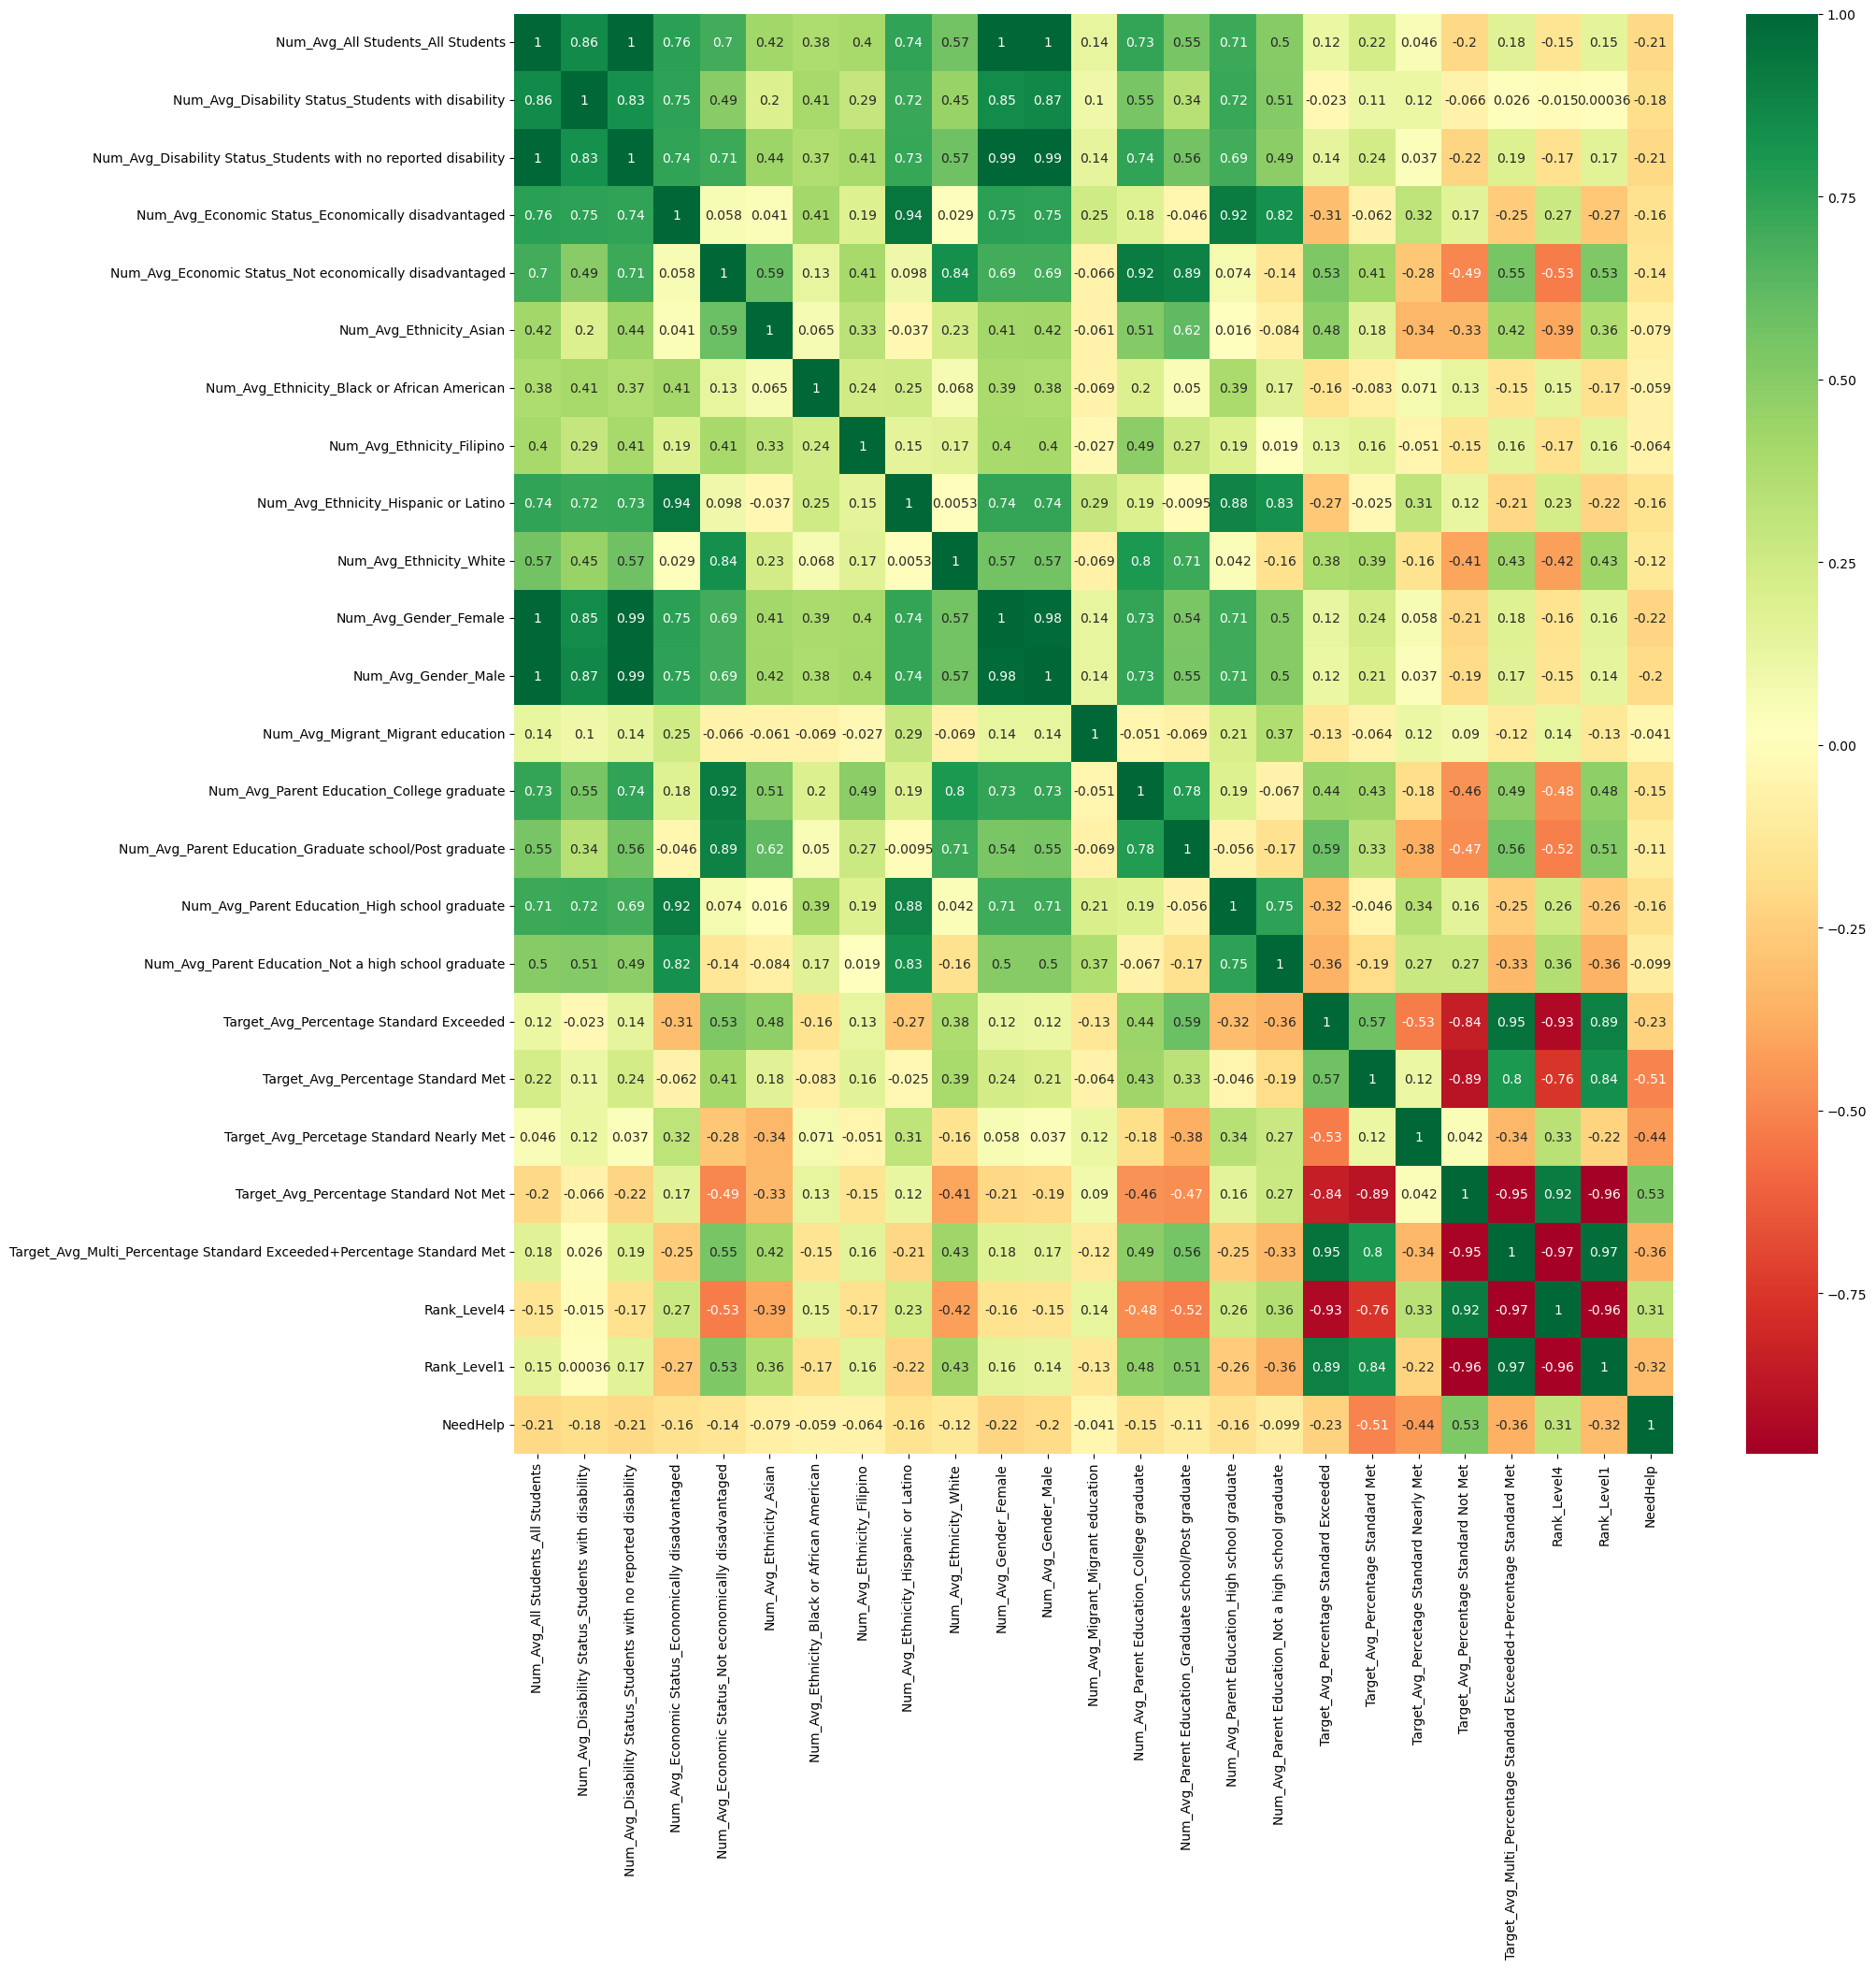

In [47]:
corr = X_all_Num.corr()
plt.figure(figsize=(20,20))
# plot heat map
g = sns.heatmap(df_schools[corr.index].corr(), annot=True, cmap="RdYlGn")

**Correlation Table with Percent Related Features**

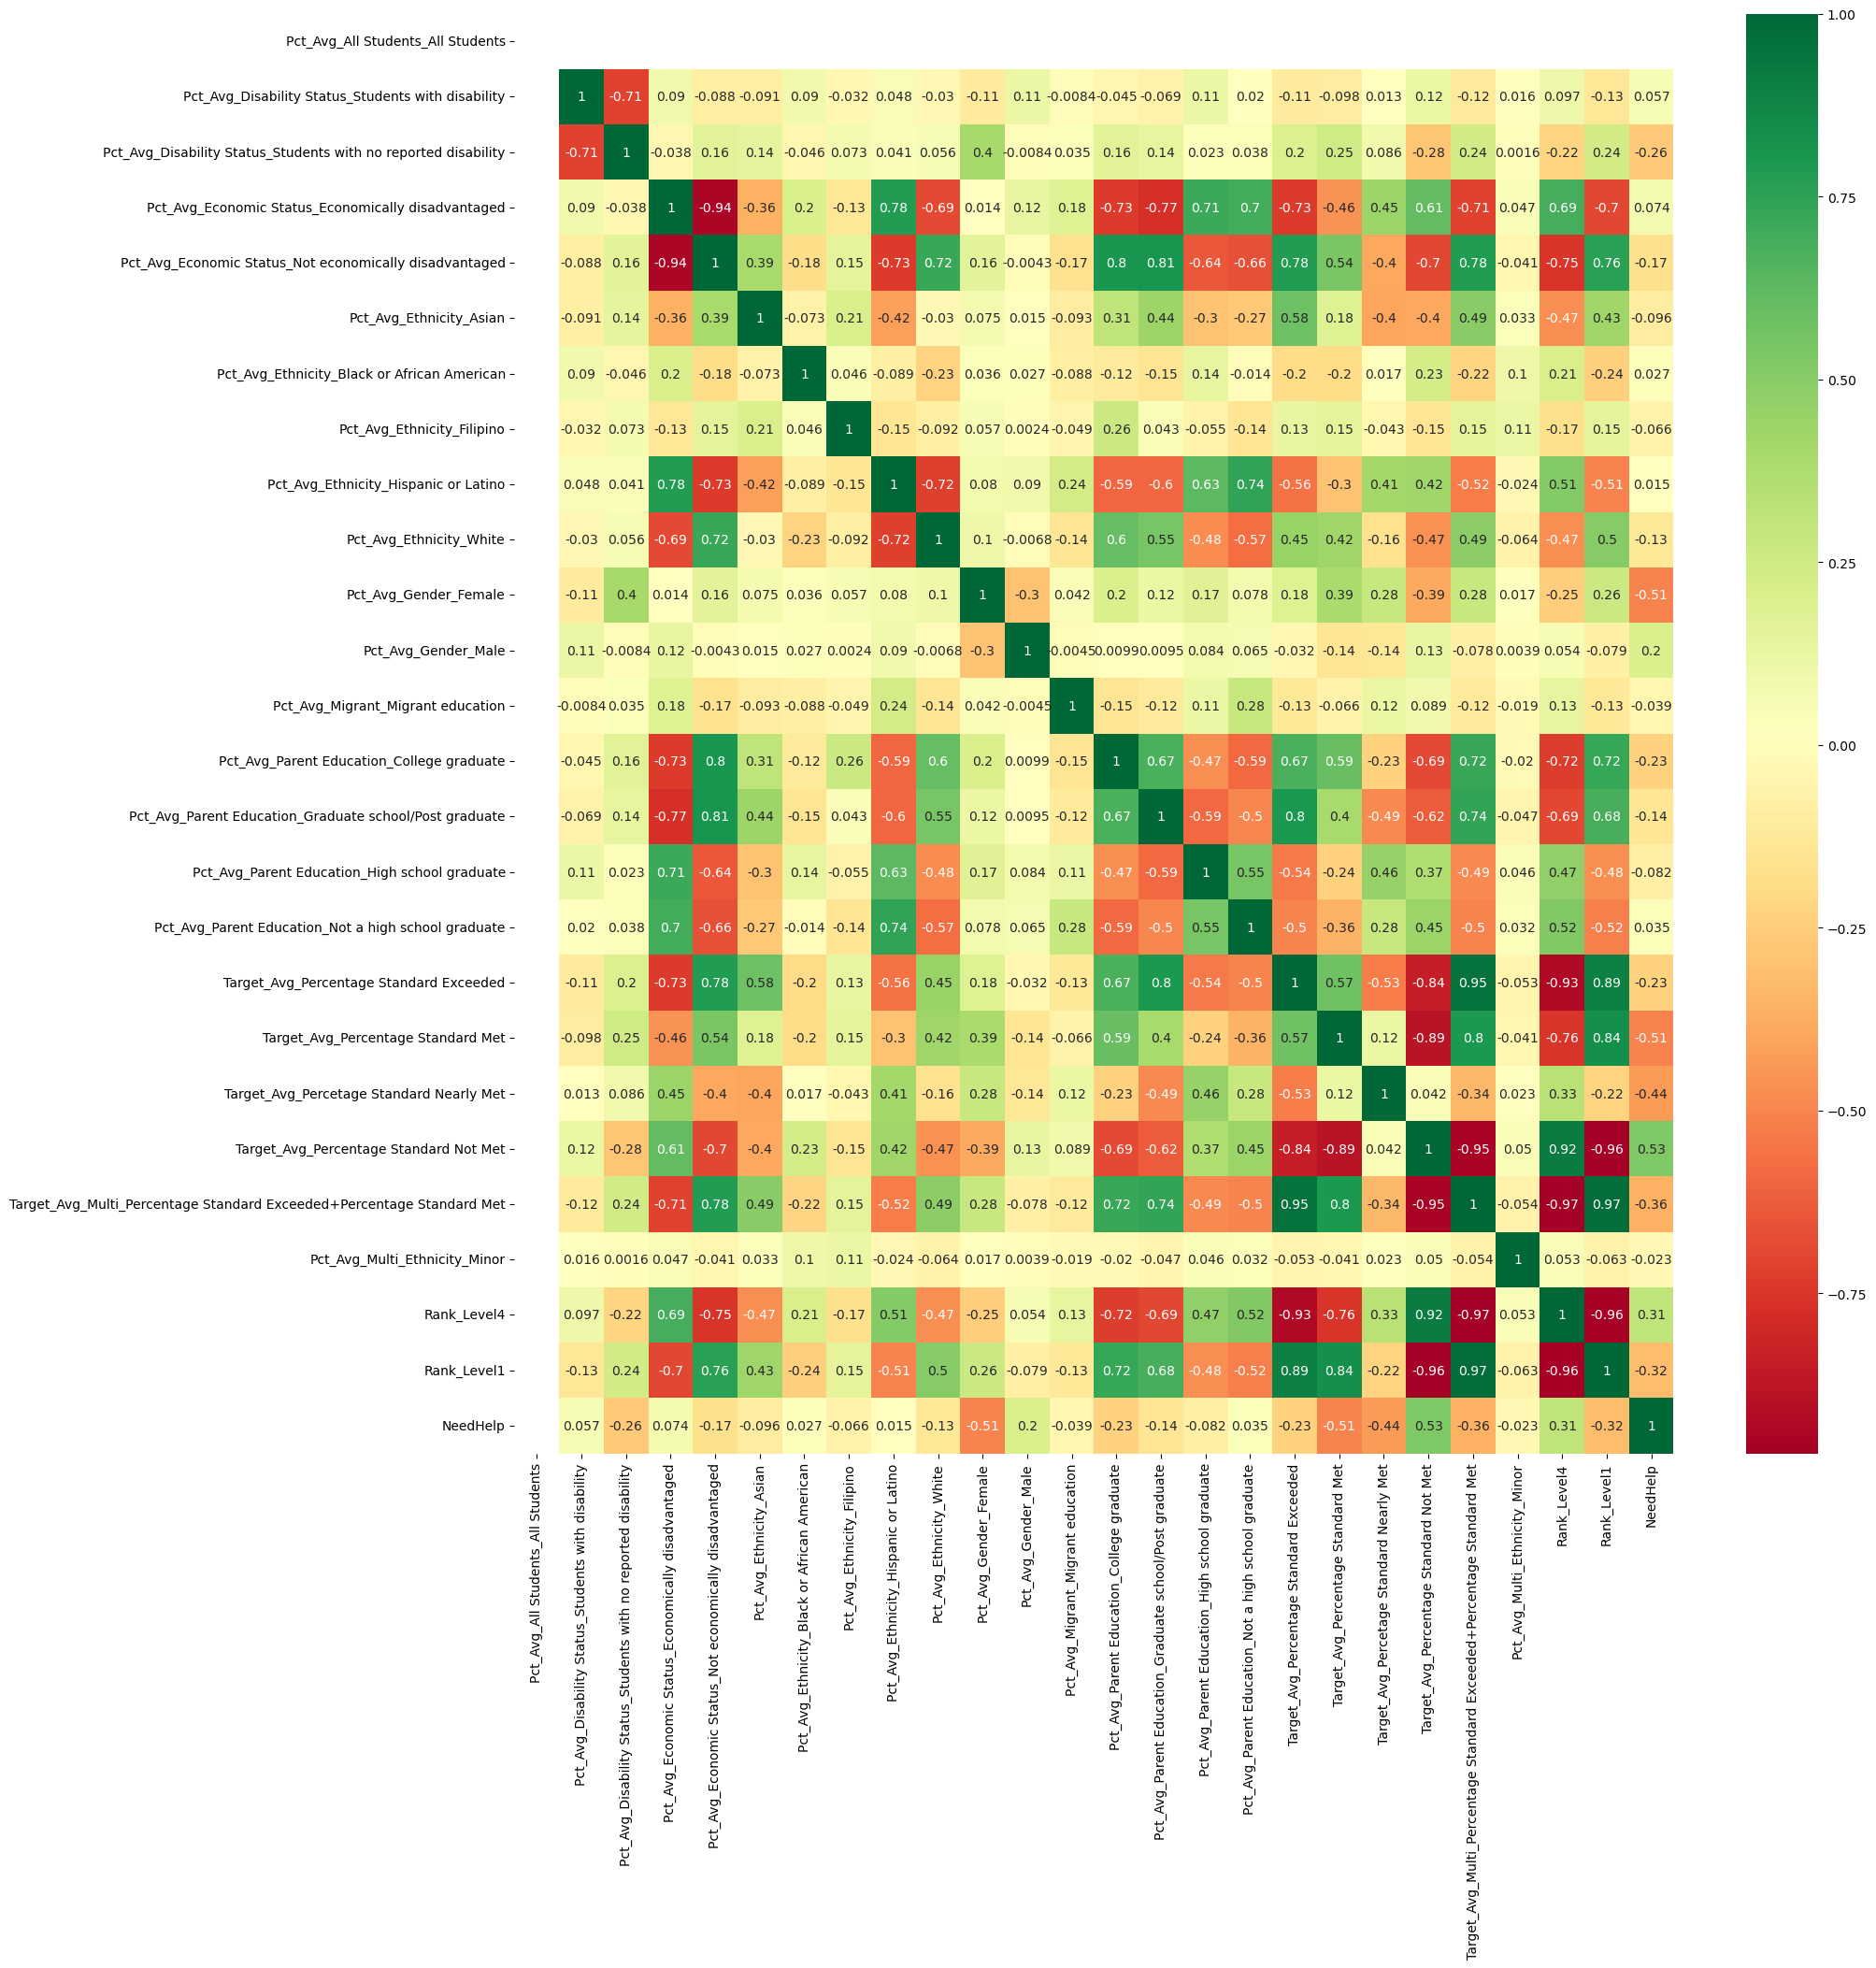

In [50]:
corr = X_all_Pct.corr()
plt.figure(figsize=(20,20))
# plot heat map
g = sns.heatmap(df_schools[corr.index].corr(), annot=True, cmap="RdYlGn")

==> With the results above, just as assumed, the high score (`Target_Avg_Percentage Standard Exceeded`) is correlated to higher the house price (`House_median`), the higher education (`Num_Avg_Parent Education_Graduate school/Post graduate`), and good economic status (`Num_Avg_Economic Status_Not economically disadvantaged`).  

It is interesting that the number of Hispanics (`Num_Avg_Ethinicity_Hispanic or Latino`) is highly correlated (**0.94**) with the number of economically disadvantaged students. The percent of Hispanics (`Pct_Avg_Ethinicity_Hispanic or Latino`) is correlated (**0.78**) but not as strong as the number feature.
In California, there is the largest number of Hispanic students among other ethnicity students, and this can be the cause of the high correlation.

In [51]:
# number of students in each ethnicity
df_ethnicity = df.groupby(["Category", "Student Groups"], as_index=False).count().round(2)

In [52]:
df_ethnicity = df_ethnicity.loc[(df_ethnicity["Category"] == "Ethnicity"), ["Category", "Student Groups", "School Name"]]
df_ethnicity

,Category,Student Groups,School Name
14,Ethnicity,American Indian or Alaska Native,276
15,Ethnicity,Asian,7667
16,Ethnicity,Black or African American,6945
17,Ethnicity,Filipino,3428
18,Ethnicity,Hispanic or Latino,16782
19,Ethnicity,Native Hawaiian or Pacific Islander,412
20,Ethnicity,Two or more races,6595
21,Ethnicity,White,12612


### Pearson’s Correlation Coefficient

Pearson's correlation coefficient tests whether two samples have a linear relationship.

Assumptions:
- Observations in each sample are independent and identically distributed.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation:
- $H_0$: The two samples are independent.
- $H_1$: There is a dependency between the samples.

Here we calculate Pearsons’s Correlation Using SciPy, `scipy.stats.pearsonr(x, y)`.  
For example, we investigated the relationship between 'Pct_Ethnicity_Asian_Mathematics' and 'Target_Percentage Standard Exceeded_Mathematics'.

In [53]:
corr, p_val = stats.pearsonr(df_schools['Pct_Ethnicity_Asian_Mathematics'], df_schools['Target_Percentage Standard Exceeded_Mathematics'])
print("* Spearman Rank Correlation between '{}' and '{}':\n corr: {:.10f}, p-value: {:.10f}".format('Pct_Ethnicity_Asian_Mathematics', 'Target_Percentage Standard Exceeded_Mathematics', corr, p_val))

KeyError: 'Pct_Ethnicity_Asian_Mathematics'

==> We reject the null hypothesis $H_0$.  
The portion of Asian students and the higher scores in Mathematics is not independent but strongly correlated.

### Spearman's Rank Correlation

Spearman's correlation measures the strength and direction of monotonic association between two variables. Spearman’s rank correlation is the Pearson’s correlation coefficient of the ranked version of the variables. We can define a function for calculating the spearman's rank correlation. 

Assumptions:
Observations in each sample are independent and identically distributed.
Observations in each sample can be ranked.

Interpretation:
- $H_0$: The two samples are independent.
- $H_1$: There is a dependency between the samples.

In [55]:
# Create a function that takes in x's and y's
def spearmans_rank_corr(xs, ys):
    
    # Calculate the rank of x's
    xranks = pd.Series(xs).rank()
    
    # Calculate the ranking of y's
    yranks = pd.Series(ys).rank()
    
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    return scipy.stats.pearsonr(xranks, yranks)

Here we calculate Spearman's Rank Correlation Using Scipy `scipy.stats.spearmanr(x, y)`.
For example, we investigate the relationship between 'House_median' and 'Target_Avg_Percentage Standard Exceeded'.

In [56]:
corr, p_val = stats.spearmanr(df_schools['House_median'], df_schools['Target_Avg_Percentage Standard Exceeded'])
print("* Spearman Rank Correlation between '{}' and '{}':\n corr {:.10f}, p-value: {:.10f}".format('House_median', 'Target_Avg_Percentage Standard Exceeded', corr, p_val))

KeyError: 'House_median'

In [60]:
df_schools.columns

Index(['School Code', 'Num_All Students_All Students_English',
       'Num_All Students_All Students_Mathematics',
       'Num_Disability Status_Students with disability_English',
       'Num_Disability Status_Students with disability_Mathematics',
       'Num_Disability Status_Students with no reported disability_English',
       'Num_Disability Status_Students with no reported disability_Mathematics',
       'Num_Economic Status_Economically disadvantaged_English',
       'Num_Economic Status_Economically disadvantaged_Mathematics',
       'Num_Economic Status_Not economically disadvantaged_English',
       ...
       'Target_Percentage Standard Not Met_All Students_All Students_Mathematics',
       'Target_Avg_Percentage Standard Exceeded',
       'Target_Avg_Percentage Standard Met',
       'Target_Avg_Percetage Standard Nearly Met',
       'Target_Avg_Percentage Standard Not Met',
       'Target_Avg_Multi_Percentage Standard Exceeded+Percentage Standard Met',
       'Pct_Avg_Multi

====> We reject the null hypothesis $H_0$.  
The house prices and high scores is not independent but correlated.